In [6]:
import pandas as pd
from prophet import Prophet

# === Load cleaned dataset ===
df = pd.read_csv("Enhanced_Education_Dataset.csv")
df["REF_DATE"] = pd.to_datetime(df["REF_DATE"], format="%d-%m-%Y", errors="coerce")

# === Set target columns ===
target_vars = ["College", "Elementary and/or High School", "University"]

# === Create full monthly date range ===
future_dates = pd.date_range(start="2024-01-01", end="2035-12-01", freq="MS")

# === Collect forecasts for wide-format reshaping ===
forecast_rows = []

for target in target_vars:
    for geo in df["GEO"].unique():
        geo_df = df[df["GEO"] == geo][["REF_DATE", target]].dropna()

        if len(geo_df) < 10:
            continue  # skip GEOs with limited data

        prophet_df = geo_df.rename(columns={"REF_DATE": "ds", target: "y"})
        model = Prophet(yearly_seasonality=True)
        model.fit(prophet_df)

        future = pd.DataFrame({'ds': future_dates})
        forecast = model.predict(future)[["ds", "yhat"]]
        forecast["GEO"] = geo
        forecast["Target"] = target

        forecast_rows.append(forecast)

# === Combine & Pivot ===
all_forecasts = pd.concat(forecast_rows)
all_forecasts.rename(columns={"ds": "Date", "yhat": "Value"}, inplace=True)
all_forecasts["Date"] = all_forecasts["Date"].dt.strftime("%d-%m-%Y")

# Pivot to wide format
final_wide_df = all_forecasts.pivot_table(
    index=["Date", "GEO"],
    columns="Target",
    values="Value"
).reset_index()

# Optional: reorder columns
final_columns = ["Date", "GEO"] + target_vars
final_wide_df = final_wide_df[final_columns]

# === Save to CSV ===
final_wide_df.to_csv("Monthly_EducationForecast_WIDE_2024_2035.csv", index=False)
print("✅ Final wide-format forecast saved to 'Monthly_EducationForecast_WIDE_2024_2035.csv'")


17:43:05 - cmdstanpy - INFO - Chain [1] start processing
17:43:06 - cmdstanpy - INFO - Chain [1] done processing
17:43:06 - cmdstanpy - INFO - Chain [1] start processing
17:43:06 - cmdstanpy - INFO - Chain [1] done processing
17:43:06 - cmdstanpy - INFO - Chain [1] start processing
17:43:06 - cmdstanpy - INFO - Chain [1] done processing
17:43:06 - cmdstanpy - INFO - Chain [1] start processing
17:43:07 - cmdstanpy - INFO - Chain [1] done processing
17:43:07 - cmdstanpy - INFO - Chain [1] start processing
17:43:07 - cmdstanpy - INFO - Chain [1] done processing
17:43:07 - cmdstanpy - INFO - Chain [1] start processing
17:43:07 - cmdstanpy - INFO - Chain [1] done processing
17:43:08 - cmdstanpy - INFO - Chain [1] start processing
17:43:08 - cmdstanpy - INFO - Chain [1] done processing
17:43:08 - cmdstanpy - INFO - Chain [1] start processing
17:43:08 - cmdstanpy - INFO - Chain [1] done processing
17:43:08 - cmdstanpy - INFO - Chain [1] start processing
17:43:09 - cmdstanpy - INFO - Chain [1]

✅ Final wide-format forecast saved to 'Monthly_EducationForecast_WIDE_2024_2035.csv'


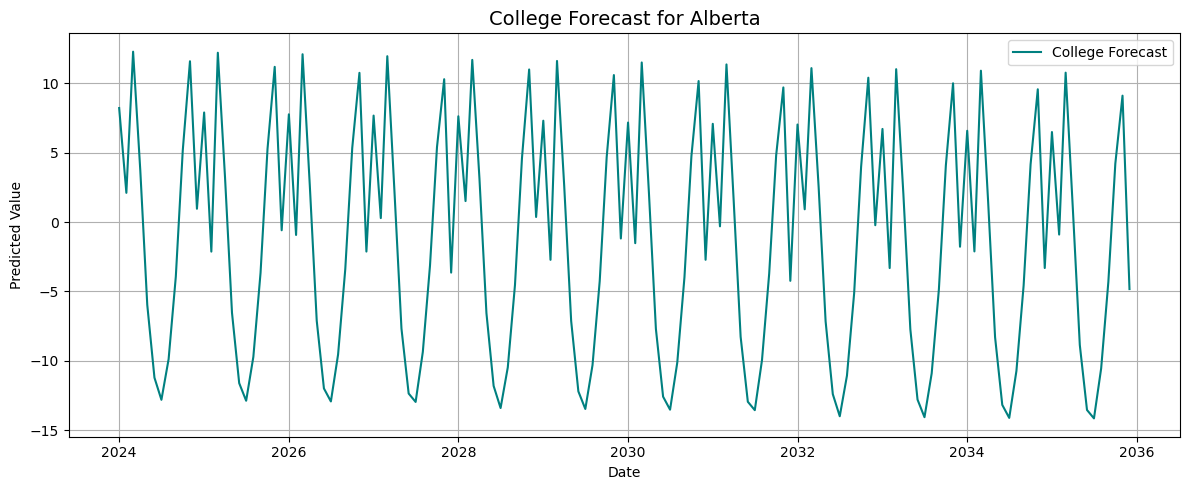

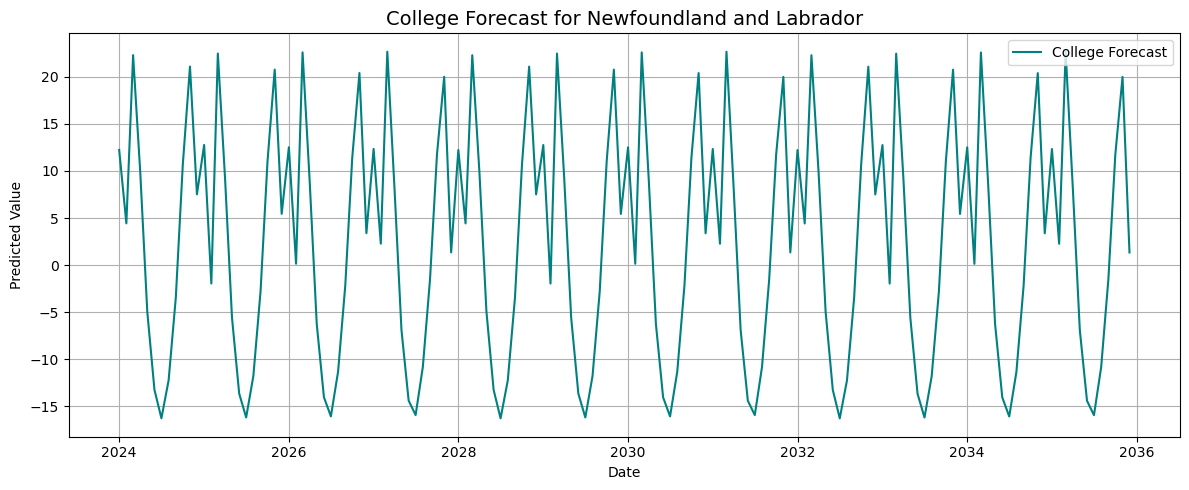

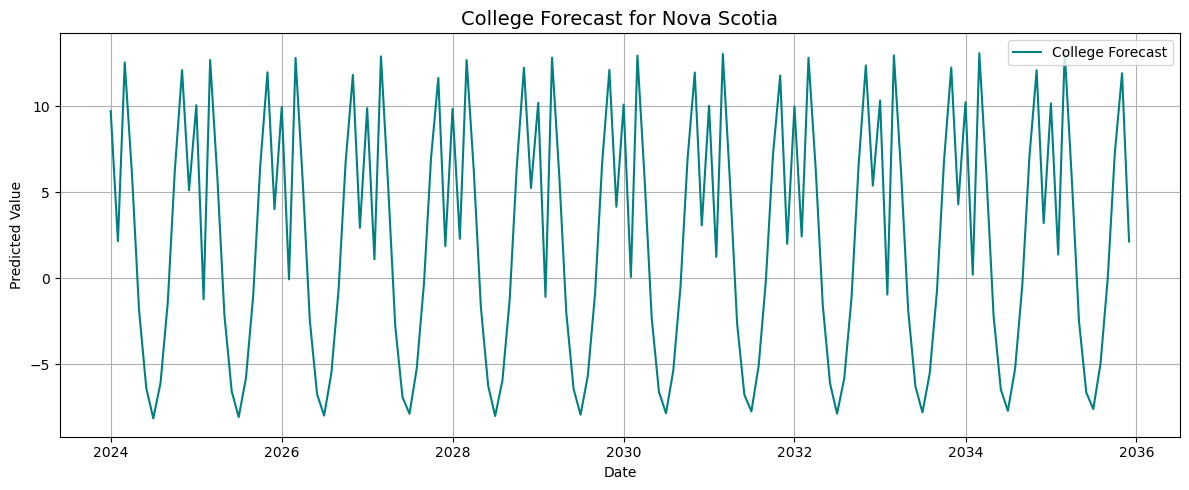

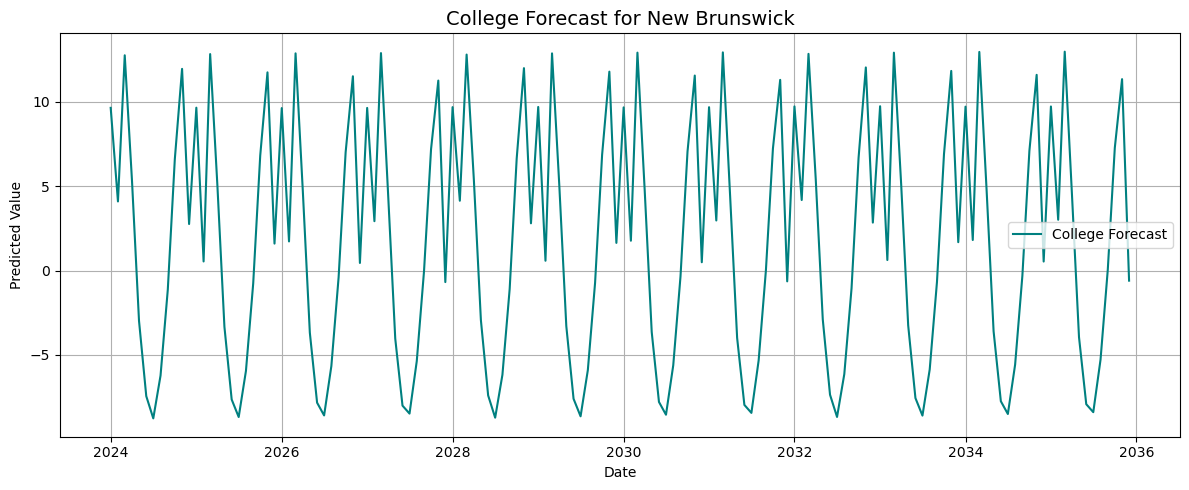

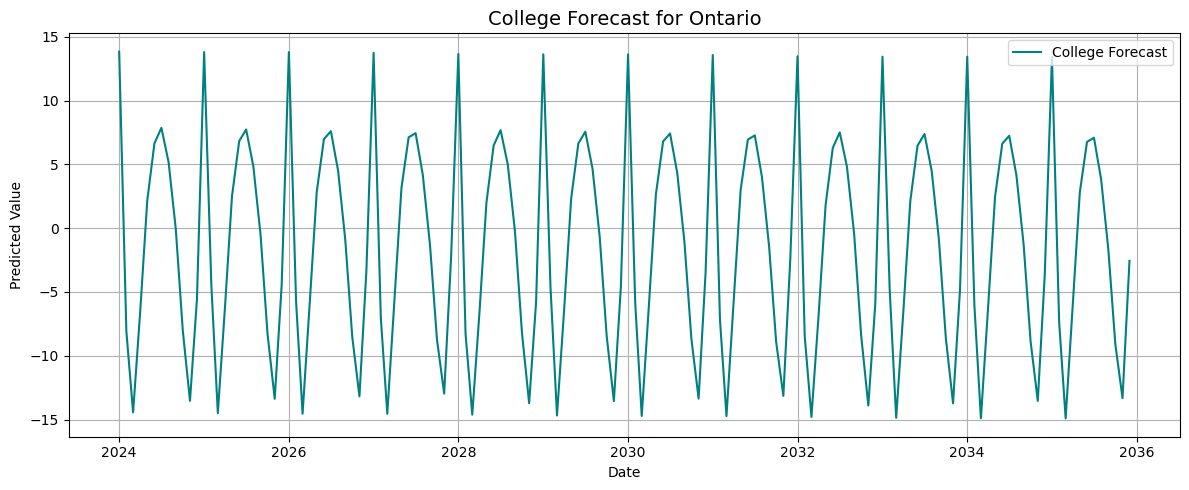

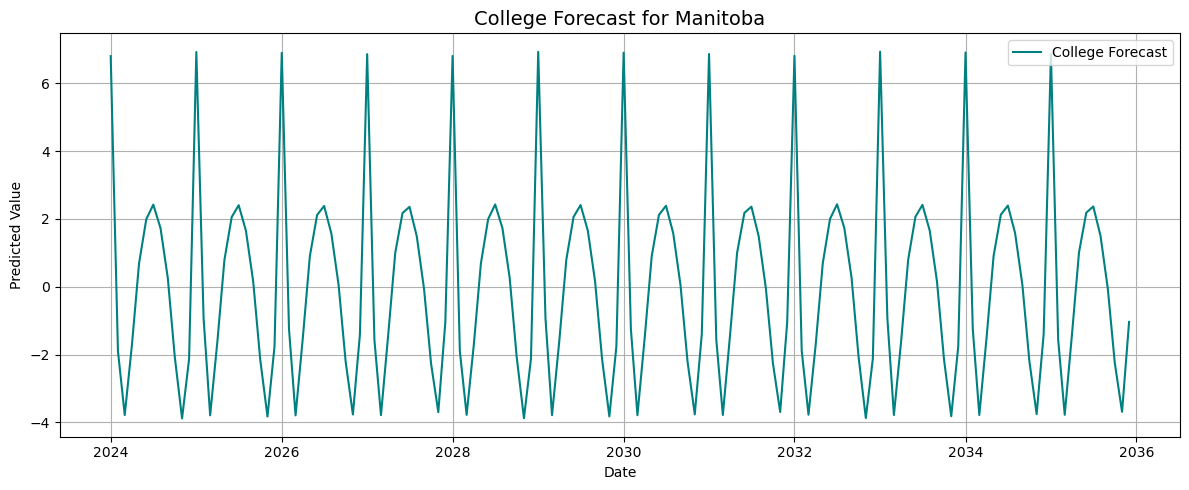

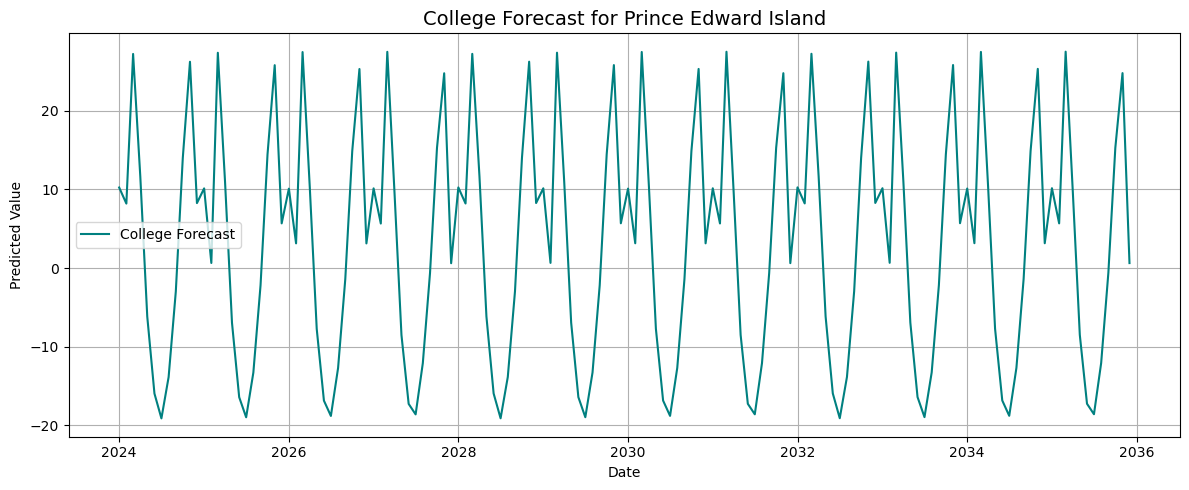

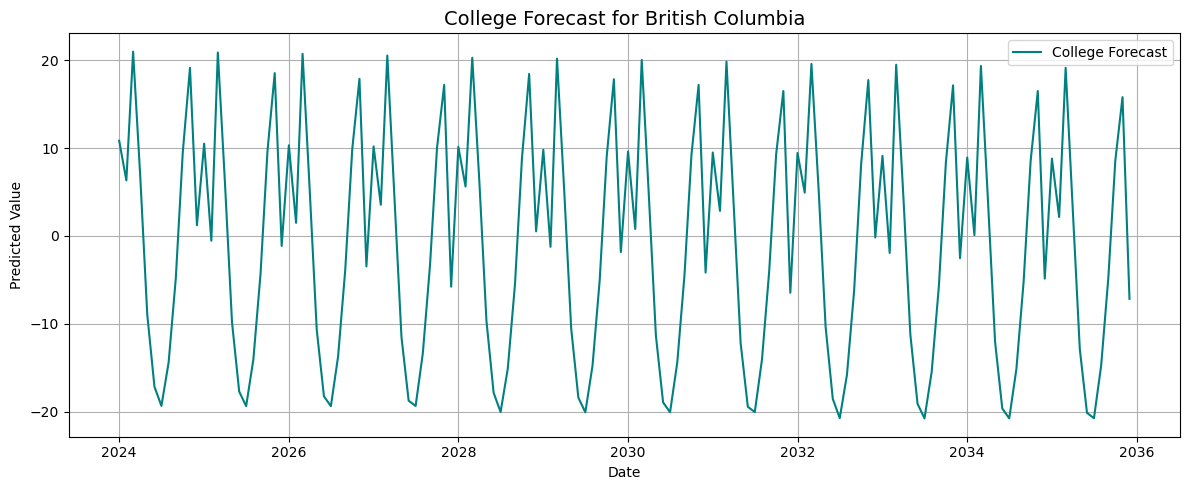

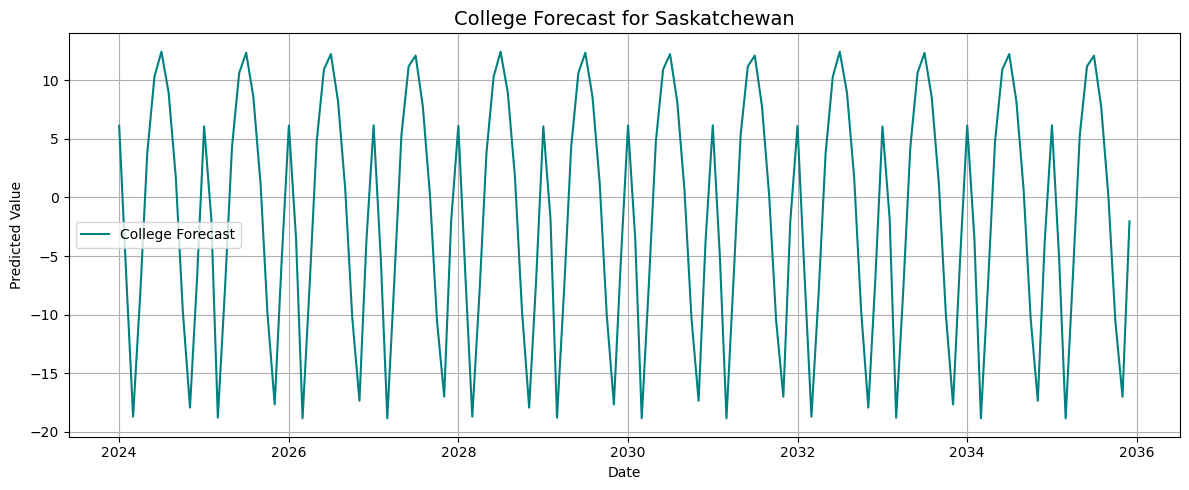

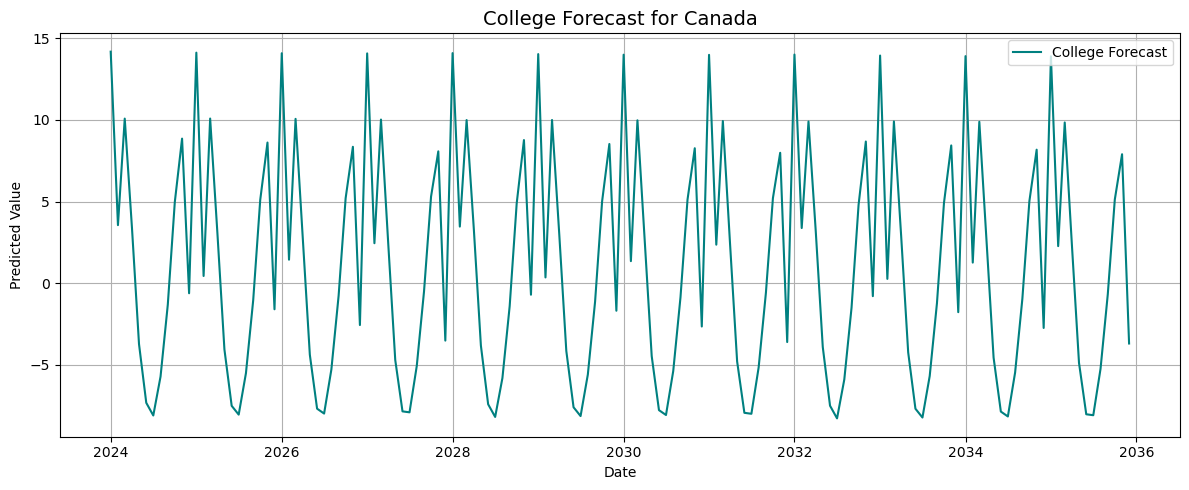

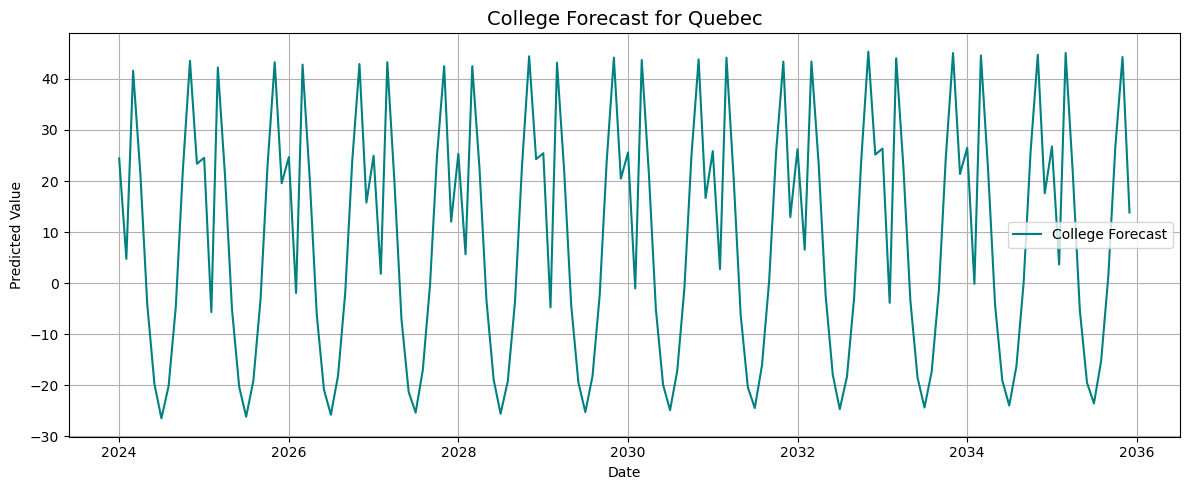

FileNotFoundError: [Errno 2] No such file or directory: 'Elementary_and/or_High_School_Alberta_Forecast.png'

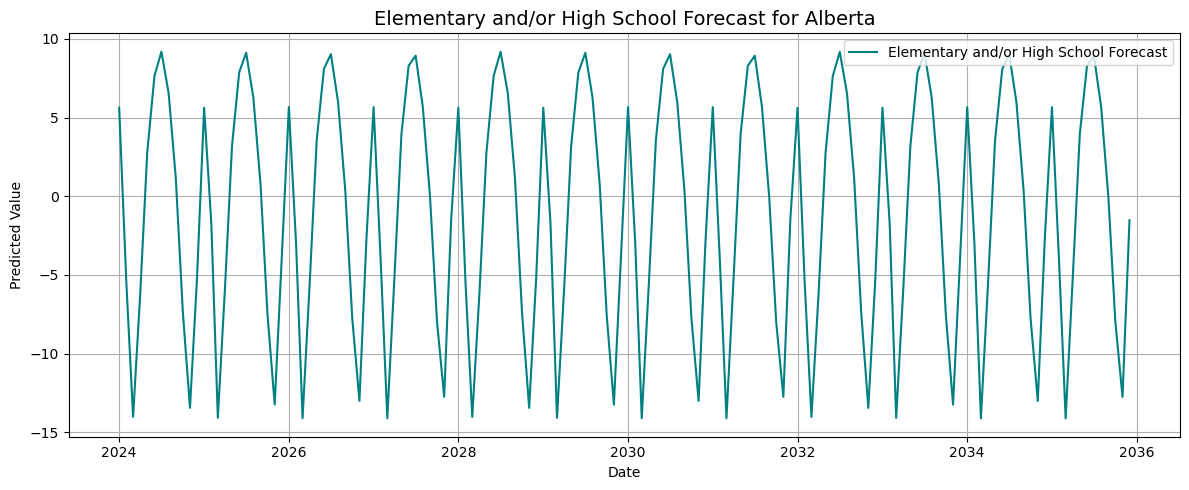

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load the forecast data ===
df = pd.read_csv("Monthly_EducationForecast_2024_2035.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%Y")

# === List of variables to plot ===
targets = df["Target"].unique()

# === Plot forecasts for each target and province ===
for target in targets:
    target_df = df[df["Target"] == target]

    provinces = target_df["GEO"].unique()
    for geo in provinces:
        geo_df = target_df[target_df["GEO"] == geo]

        # === Plot ===
        plt.figure(figsize=(12, 5))
        plt.plot(geo_df["Date"], geo_df["Predicted_Value"], label=f"{target} Forecast", color="teal")
        plt.title(f"{target} Forecast for {geo}", fontsize=14)
        plt.xlabel("Date")
        plt.ylabel("Predicted Value")
        plt.grid(True)
        plt.tight_layout()
        plt.legend()

        # === Save or Show ===
        plt.savefig(f"{target.replace(' ', '_')}_{geo.replace(' ', '_')}_Forecast.png")
        plt.show()
